# Project - Lending Club Loan Data Analysis

### Tasks:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Assesment-1-load-loan-data/loan_data.csv')

In [3]:
df.shape

(9578, 14)

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.info

<bound method DataFrame.info of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082

In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

# step-1 - Feature Transformation

In [8]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

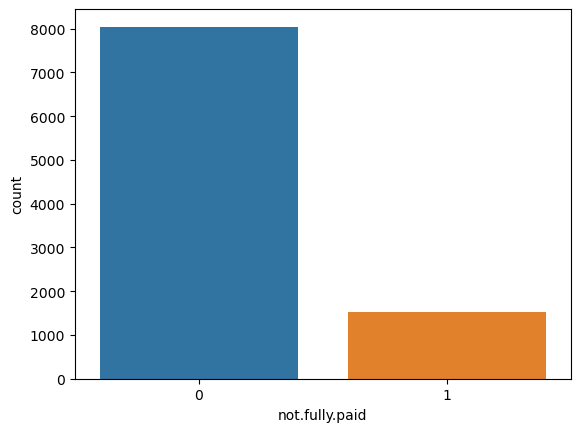

In [9]:
sns.countplot(x=df['not.fully.paid'])
plt.show()

<AxesSubplot:xlabel='purpose', ylabel='count'>

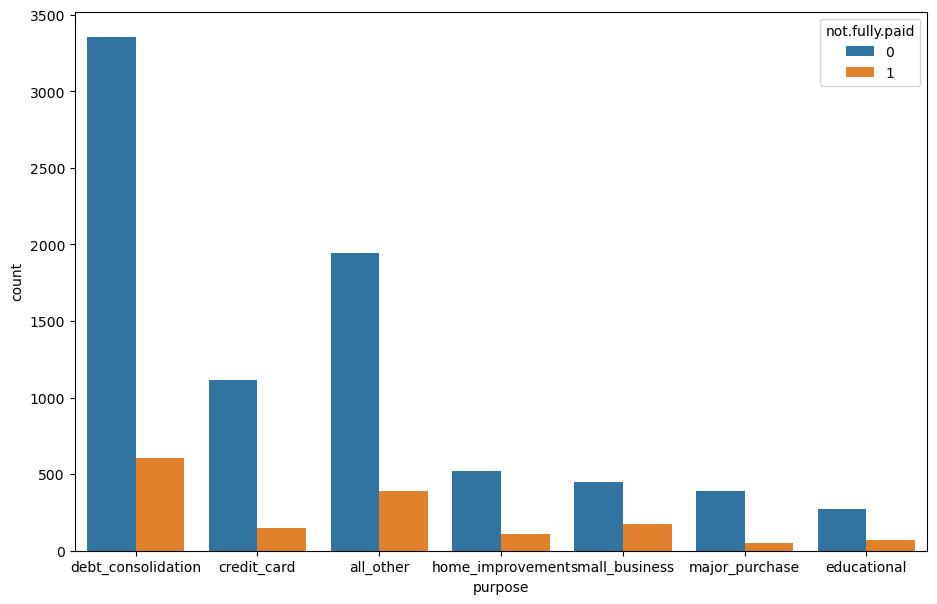

In [10]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df)

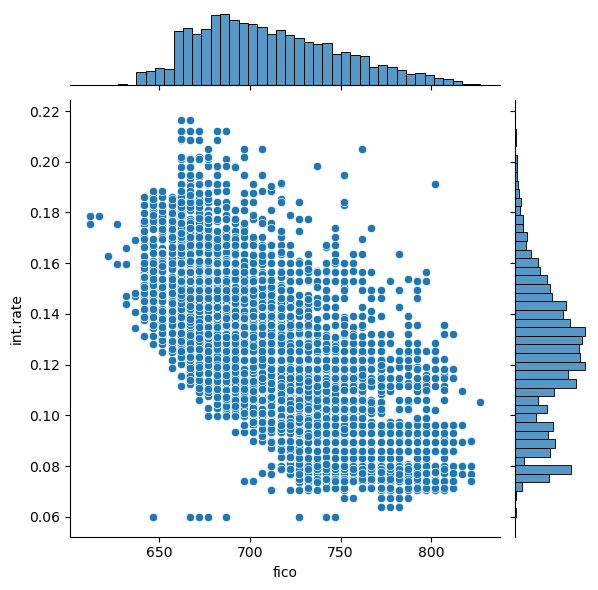

In [20]:
sns.jointplot(x='fico',y='int.rate',data=df)

In [21]:
#sns.set_theme(style="darkgrid")
# Plot the responses for different events and regions
#sns.lineplot(x="timepoint", y="signal",
#             hue="not.fully.paid", style="event",
 #            data=df)

# step-2 - Exploratory data analysis of different factors of the dataset

### Handeling imbalanced dataset

In [22]:

not_fully_paid_0=df[df['not.fully.paid']==0]
not_fully_paid_1=df[df['not.fully.paid']==1]

In [23]:
not_fully_paid_0.shape

(8045, 14)

In [24]:
not_fully_paid_1.shape

(1533, 14)

In [25]:
#resample
from sklearn.utils import resample
df_minor_upsampled=resample(not_fully_paid_1,replace=True,n_samples=8045)
new_df=pd.concat([not_fully_paid_0,df_minor_upsampled])

from sklearn.utils import shuffle
new_df=shuffle(new_df)

In [26]:
new_df['not.fully.paid'].value_counts()

0    8045
1    8045
Name: not.fully.paid, dtype: int64

In [27]:
new_df.shape

(16090, 14)

In [28]:
#Apply label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

for i in new_df.columns:
  if new_df[i].dtypes=='object':
    new_df[i]=lr.fit_transform(new_df[i])

In [29]:
new_df.dtypes

credit.policy          int64
purpose                int32
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

# step-3 Additional Feature Engineering

In [30]:
new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.217216
fico                 0.212468
credit.policy        0.191574
inq.last.6mths       0.178498
revol.util           0.106537
installment          0.074507
pub.rec              0.063867
purpose              0.062956
revol.bal            0.062303
dti                  0.048493
days.with.cr.line    0.038619
log.annual.inc       0.035229
delinq.2yrs          0.009259
Name: not.fully.paid, dtype: float64

<AxesSubplot:>

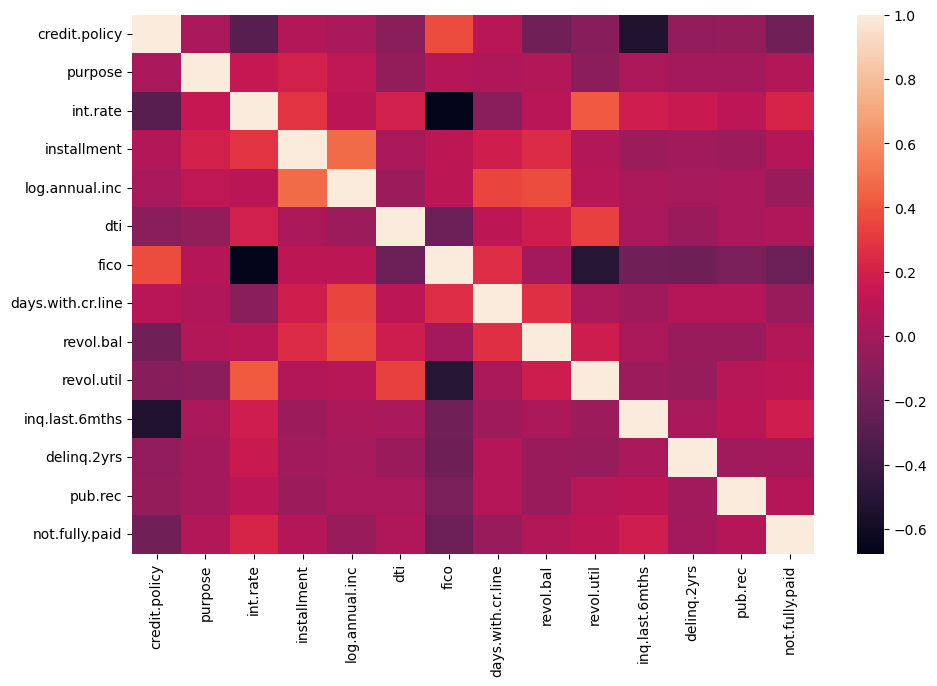

In [31]:
plt.figure(figsize=(11,7))
sns.heatmap(new_df.corr(),annot=False)

In [32]:
X=new_df[['int.rate','fico','credit.policy','inq.last.6mths','revol.util','installment','purpose','dti','pub.rec']]

In [33]:
y=new_df[['not.fully.paid']]

In [34]:
X.shape

(16090, 9)

In [35]:
y.shape

(16090, 1)

In [39]:
#create train set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [41]:
X_train

array([[-0.28899776, -0.49619972,  0.58153662, ..., -1.14664164,
         1.35900217, -0.2708304 ],
       [-0.31133354,  0.85202564,  0.58153662, ..., -1.14664164,
        -1.2426909 , -0.2708304 ],
       [-1.96045849,  1.52613832,  0.58153662, ..., -1.14664164,
         1.03432927, -0.2708304 ],
       ...,
       [-0.44162558,  1.25649325,  0.58153662, ..., -0.01028477,
        -0.85337073, -0.2708304 ],
       [-0.98885214,  0.31273549,  0.58153662, ..., -1.14664164,
        -1.10477675,  3.39877896],
       [ 0.18377621,  0.04309042,  0.58153662, ..., -0.01028477,
        -0.88066624, -0.2708304 ]])

# step-4  -  Apply Model Building-ANN

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
model = Sequential()
model.add(Dense(19,activation='relu',input_shape=[9]))
model.add(Dropout(0.3))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.3))

#output layer
model.add(Dense(1,activation='sigmoid'))

In [44]:
#compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                190       
                                                                 
 dropout (Dropout)           (None, 19)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                200       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [46]:
early_stop=EarlyStopping(monitor  = 'val_loss',
                         min_delta= 0.01, 
                         mode     = 'min', 
                         verbose  = 1,
                         patience = 10)

In [47]:
model.fit(X_train,y_train,
          epochs=100,
          batch_size=256,
          validation_data=(X_test,y_test))
          #callbacks=[early_stop])

Epoch 1/100
51/51 [==============================] - 1s 4ms/step - loss: 0.8483 - accuracy: 0.5127 - val_loss: 0.7006 - val_accuracy: 0.5292
Epoch 2/100
51/51 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.5552 - val_loss: 0.6710 - val_accuracy: 0.5718
Epoch 3/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5692 - val_loss: 0.6656 - val_accuracy: 0.5836
Epoch 4/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5740 - val_loss: 0.6633 - val_accuracy: 0.5976
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.5879 - val_loss: 0.6624 - val_accuracy: 0.6044
Epoch 6/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.5882 - val_loss: 0.6611 - val_accuracy: 0.6066
Epoch 7/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.5968 - val_loss: 0.6601 - val_accuracy: 0.6085
Epoch 8/100
5

Epoch 59/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.6246 - val_loss: 0.6492 - val_accuracy: 0.6162
Epoch 60/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.6228 - val_loss: 0.6489 - val_accuracy: 0.6134
Epoch 61/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.6261 - val_loss: 0.6486 - val_accuracy: 0.6153
Epoch 62/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.6238 - val_loss: 0.6489 - val_accuracy: 0.6150
Epoch 63/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.6233 - val_loss: 0.6486 - val_accuracy: 0.6150
Epoch 64/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6235 - val_loss: 0.6489 - val_accuracy: 0.6144
Epoch 65/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.6325 - val_loss: 0.6484 - val_accuracy: 0.6165
Epoch 

In [48]:
predictions = (model.predict(X_test)>0.5).astype('int32')

101/101 [==============================] - 0s 687us/step


In [49]:
predictions

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [50]:
score = model.evaluate(X_test,verbose=0)
print(score)

[0.0, 0.0]


In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,predictions)

0.6199502796768179

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64      1642
           1       0.62      0.58      0.60      1576

    accuracy                           0.62      3218
   macro avg       0.62      0.62      0.62      3218
weighted avg       0.62      0.62      0.62      3218



In [53]:
model.save('model1')

INFO:tensorflow:Assets written to: model1\assets


In [54]:
import tensorflow
from tensorflow.keras.layers import BatchNormalization

In [55]:
#Create Model2
#Change 3 hidden layers, 128,64,32, tanh, batchnormalization
model = Sequential()

#first hidden layer
model.add(Dense(128,activation='relu',input_shape=[9]))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#second hidden layer
model.add(Dense(64,activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#Third hidden layer
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#output layer
model.add(Dense(1,activation='sigmoid'))

In [56]:
#compile the model
model.compile(loss='binary_crossentropy',optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])

In [57]:
early_stop=EarlyStopping(monitor='accuracy',
                         min_delta=0.01,
                         mode='min',
                         verbose=1,patience=5)

In [58]:
model.fit(X_train,y_train,
          epochs=100,
          batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/100
51/51 [==============================] - 1s 5ms/step - loss: 0.6770 - accuracy: 0.5971 - val_loss: 0.6566 - val_accuracy: 0.6085
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.6288 - val_loss: 0.6532 - val_accuracy: 0.6122
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6361 - accuracy: 0.6294 - val_loss: 0.6561 - val_accuracy: 0.6041
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6324 - accuracy: 0.6342 - val_loss: 0.6488 - val_accuracy: 0.6094
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6302 - accuracy: 0.6408 - val_loss: 0.6426 - val_accuracy: 0.6280
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6277 - accuracy: 0.6411 - val_loss: 0.6469 - val_accuracy: 0.6249
Epoch 7/100
51/51 [==============================] - 0s 3ms/step - loss: 0.6254 - accuracy: 0.6429 - val_loss: 0.6386 - val_accuracy: 0.6290
Epoch 8/100
5

Epoch 59/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5636 - accuracy: 0.7018 - val_loss: 0.5741 - val_accuracy: 0.6989
Epoch 60/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5648 - accuracy: 0.6966 - val_loss: 0.5769 - val_accuracy: 0.6871
Epoch 61/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5643 - accuracy: 0.7022 - val_loss: 0.5730 - val_accuracy: 0.6892
Epoch 62/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.7032 - val_loss: 0.5780 - val_accuracy: 0.6871
Epoch 63/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5637 - accuracy: 0.6997 - val_loss: 0.5809 - val_accuracy: 0.6874
Epoch 64/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5599 - accuracy: 0.7059 - val_loss: 0.5687 - val_accuracy: 0.7017
Epoch 65/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5628 - accuracy: 0.7005 - val_loss: 0.5766 - val_accuracy: 0.6924
Epoch 

In [59]:
prediction=(model.predict(X_test)>0.5).astype('int32')

101/101 [==============================] - 0s 689us/step


In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,prediction)

0.7165941578620261

# Hyperparameter Tuning

In [52]:
pip install keras_tuner

     -------------------------------------- 135.7/135.7 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [61]:
def build_model(hp):
  model = Sequential()
 
  #first hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024,step=16),
                  activation=hp.Choice('activation',['relu','tanh']),input_shape=[9]))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
  
  #second hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024,step=16),
                  activation=hp.Choice('activation',['relu','tanh']),input_shape=[9]))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
  
  #Third hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024,step=16),
                  activation=hp.Choice('activation',['relu','tanh']),input_shape=[9]))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
  
  #output layer
  model.add(Dense(1,activation='sigmoid'))

  learning_rate=hp.Float('learning_rate',min_value=0.001,max_value=0.1,step=0.02)

  #compile the model
  model.compile(loss='binary_crossentropy',
                optimizer=tensorflow.keras.optimizers.Adam(learning_rate),
                metrics=['accuracy'])
  return model

In [62]:
import keras_tuner as kt
build_model(kt.HyperParameters())

In [63]:
rtuner=kt.RandomSearch(hypermodel=build_model,
                       objective='val_accuracy',
                       max_trials=3,
                       executions_per_trial=2,
                       overwrite=True)

In [64]:
rtuner.search(X_train,y_train,epochs=4,validation_data=(X_test,y_test))

Trial 3 Complete [00h 00m 36s]
val_accuracy: 0.5793971419334412

Best val_accuracy So Far: 0.5981976389884949
Total elapsed time: 00h 01m 42s
INFO:tensorflow:Oracle triggered exit
